In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import f_oneway
sns.set_style("whitegrid")

In [2]:
# Reading the data

dssal = pd.read_csv("ds_salaries.csv", index_col=[0])
print("The shape of data: ", dssal.shape)

The shape of data:  (607, 11)


In [3]:
dssal.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
# checking the data types of the data

dssal.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

- The data types looks fine according to the columns
- Tha categorical columns will require encoding which will be done in data processing step



In [5]:
# Describe the numerical columns

dssal.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


- We have data from 2020 to 2022
- The minimum salary here is 2859 dollars and maximum salary is 600,000 dollars
- 50% of the employees have salaries less than 62726 dollars
- Also in case of remote work 50% of the employee positions does more than 80% of their work remotely



In [6]:
# Checking for missing values

dssal.isna().sum()*100/dssal.shape[0]

work_year             0.0
experience_level      0.0
employment_type       0.0
job_title             0.0
salary                0.0
salary_currency       0.0
salary_in_usd         0.0
employee_residence    0.0
remote_ratio          0.0
company_location      0.0
company_size          0.0
dtype: float64

- There are no missing values in the data

### Univariate Analysis
- Here we will see the distributions of each variable and what information each variable is carrying

In [7]:
# Mapping the categorical variables into strings

cleanup_nums = {"remote_ratio":     {0: "no_remote", 50: "partially_remote", 100:"fully_remote"}}
dssal = dssal.replace(cleanup_nums)

In [8]:
dssal.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,no_remote,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,no_remote,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,partially_remote,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,no_remote,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,partially_remote,US,L


<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

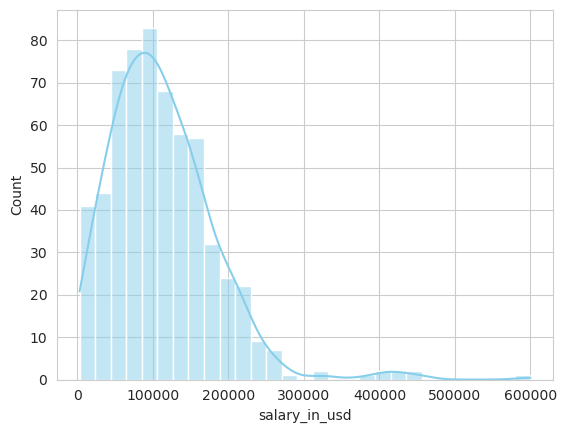

In [9]:
# Plotting the histogram for the numerical columns
# There is nothing to plot for year
# I will plot the salary_in_usd because it is in the common units


sns.histplot(data=dssal, x="salary_in_usd", kde= True, color="skyblue")


#### Observation:
- Maximum of the positions' salary is in between 50000 USD to 150000 USD


In [10]:
# Categorical variables

dssal.select_dtypes('object').columns

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

<AxesSubplot:>

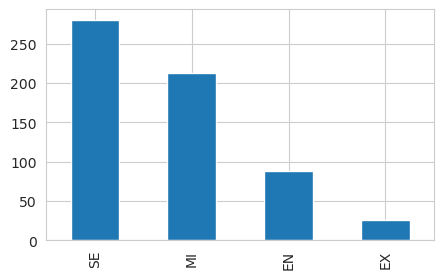

In [11]:
# experience level

dssal["experience_level"].value_counts().plot(kind = "bar", figsize=(5,3))



### Observations:
- The top 3 positions employed highest are senior level, mid level and entry level respectively
- Above 250 positions are senior level positions and hence they are the highest data science position being hired
- The least being the executive level positions


<AxesSubplot:>

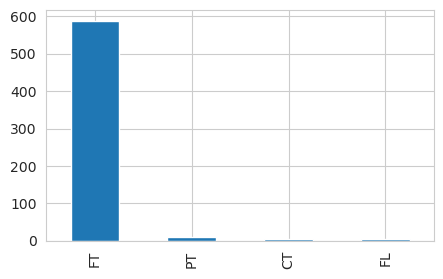

In [12]:
# employment type

dssal["employment_type"].value_counts().plot(kind = "bar", figsize=(5,3))

### Observations:

- This is interesting. Almost all the positions are hired for full time positions. There is very negligible part time, contractual or freelancers hired

<AxesSubplot:>

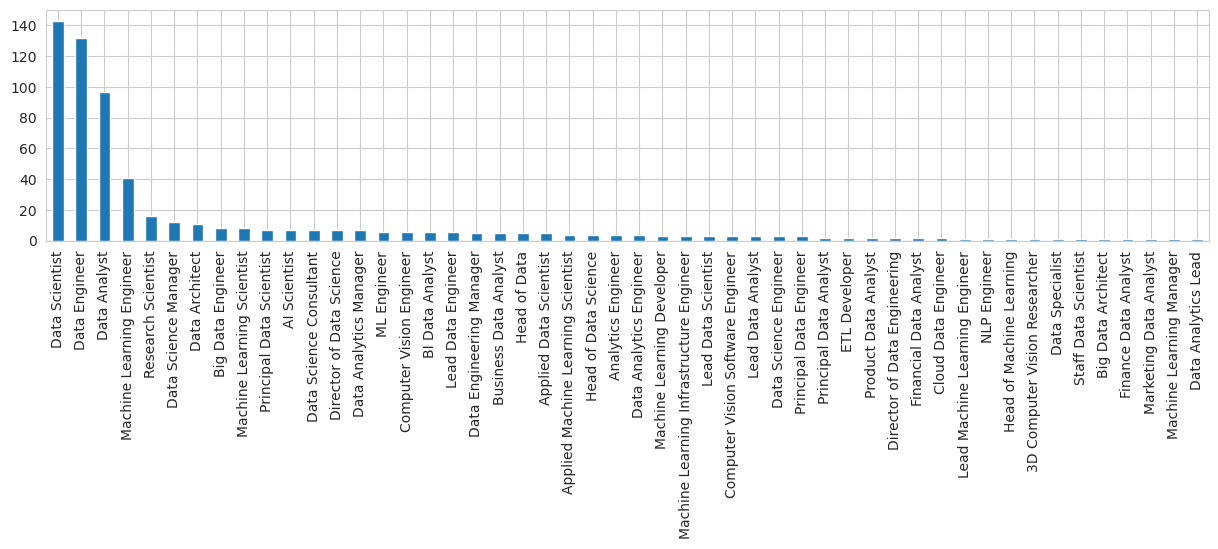

In [13]:
# job_title

dssal["job_title"].value_counts().plot(kind = "bar", figsize=(15,3))


### Observations:
- The top 5 positions for which employees were hired maximum during 2020 to 2022 are:
    - Data Scientist
    - Data Engineer
    - Data Analyst
    - Machine Learning Engineer
    - Reseacrch Scientist


<AxesSubplot:>

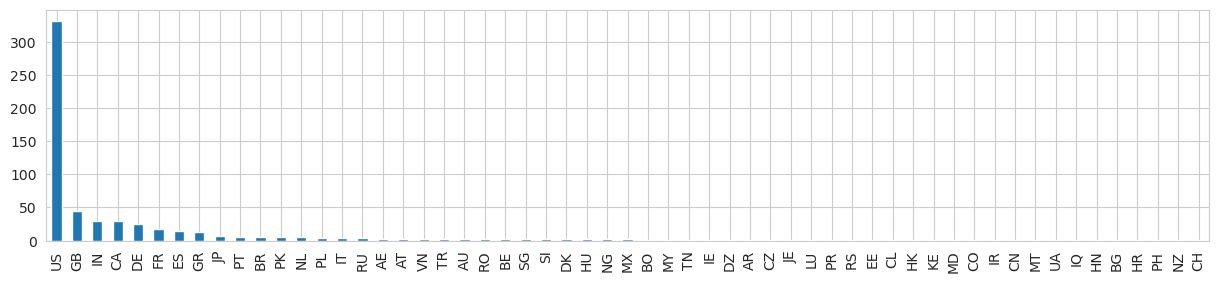

In [14]:
# Employee residence

dssal["employee_residence"].value_counts().plot(kind = "bar", figsize=(15,3))

### Observation:

- United States(US) has the highest number of employees hired in between 2020 to 2022 followed by Great Britain(GB) and India(IN)

<AxesSubplot:>

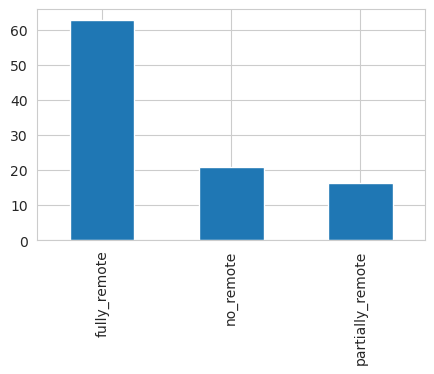

In [15]:
# remote ratio

np.round(dssal["remote_ratio"].value_counts()*100/dssal.shape[0],2).plot(kind= "bar" , figsize=(5,3))

### Observation:
- 62% of the positions have their work done in fully remote mode and 15 to 20% positions have it either partially remote or no remote work

## Bi-variate analysis

In [16]:
dssal.select_dtypes("number").columns

Index(['work_year', 'salary', 'salary_in_usd'], dtype='object')

Text(0.5, 1.0, 'Salary by year')

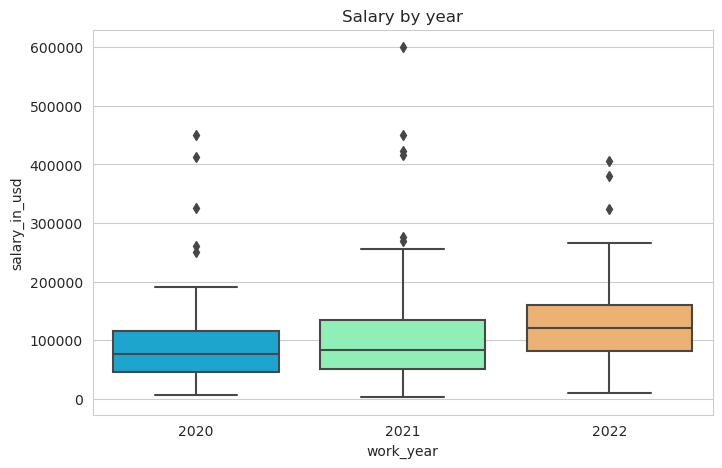

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x="work_year", y="salary_in_usd", data=dssal, palette="rainbow")
plt.title("Salary by year")

### Observations:

- There is a pattern of salary increasing with year.

### Hypotheisis Test 1:

    - Null Hypotheisis(Ho): There is no relationship between experience_level and salary
    - Alternate Hypotheisis(H1): There is a relationship between experience_level and salary

In [22]:
# Dividing the experiences in groups

entry_level = dssal.groupby(["experience_level"])["salary_in_usd"].unique()[0]
executive_level = dssal.groupby(["experience_level"])["salary_in_usd"].unique()[1]
mid_level = dssal.groupby(["experience_level"])["salary_in_usd"].unique()[2]
senior_level = dssal.groupby(["experience_level"])["salary_in_usd"].unique()[3]

In [24]:
# entry level and executive level

f_oneway(entry_level, executive_level, mid_level, senior_level)

F_onewayResult(statistic=48.761547994911545, pvalue=3.831685250140349e-27)

### Objectives:

- P value is less than 0.05 which means that we are  rejecting the null hypotheisis. We have sufficient evidence that there is a difference in average salary among the four experience levels.

Text(0.5, 1.0, 'Salary by year')

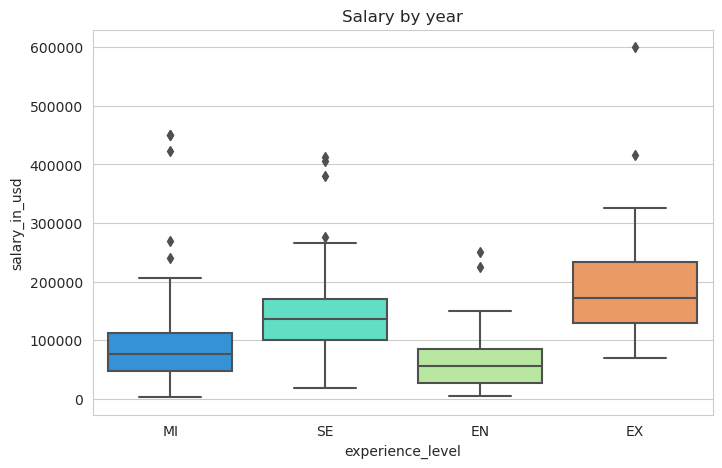

In [21]:
# Lets look at the boxplot as weel to see it

plt.figure(figsize=(8,5))
sns.boxplot(x="experience_level", y="salary_in_usd", data=dssal, palette="rainbow")
plt.title("Salary by experience")

- Yes, the box plot gives the same conclusion. The highest salary is taken by executive followed by senior, midlevel and entry level respectively.